In [5]:
%matplotlib notebook
#%matplotlib inline

#https://stackoverflow.com/questions/20961287/what-is-pylab
##from matplotlib.pylab import *
from pylab import *
import numpy as np


#parameters are described at  https://github.com/martin12333/PyMartinCA/blob/master/PARAMETERS.txt

r=1
am51printthres=      0.175

diam = 2*r + 1



bmin0=2; bmax0=2; smin0=2; smax0=2
bmin0=3; bmax0=3; smin0=3; smax0=4


ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3
ndbmin=3; ndbmax=7; ndsmin=3; ndsmax=1
ndbmin=3; ndbmax=7; ndsmin=3; ndsmax=7
#ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
ndbmin=4; ndbmax=4; ndsmin=4; ndsmax=4
ndbmin=3; ndbmax=4; ndsmin=3; ndsmax=4
ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
pskip=0



#=============================

w=320#256##320#240#320 ##64*diam #256 #1850 #2000 #2250 #1800
h=w #256 #1300 #1400 #950

w0=40#64#128
h0=40#64#128

w2=240#128#16#25#16
h2=240#128#16#25#16

#

np.random.seed()      


#=============================

###x11 = floor(linspace(xlo, xhi + 0.999, w))
###y11 = floor(linspace(yhi + 0.999 , ylo, h))
#x11 = (linspace(xlo, xhi , w))
#y11 = (linspace(yhi  , ylo, h))
#xx, yy = meshgrid(x11, y11)
 
#

ns=9#15#30#1 #7#10 #3



niter =2000 #6000#2400 #300#150# 600 #300 #400 #200 #1000 #3000   
#niter0=niter-150
#sleep1=    0 #0.3      #0.1 #0 #0.01
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
step2=60 #120 #1

bfade = False#True  # False
q = 0.1#0.9 #0.8#0.7 #0.3 #0.1 
###qqq=0.2 ###0 #0.5 #1#2 #4 #8 #1.8


<IPython.core.display.Javascript object>


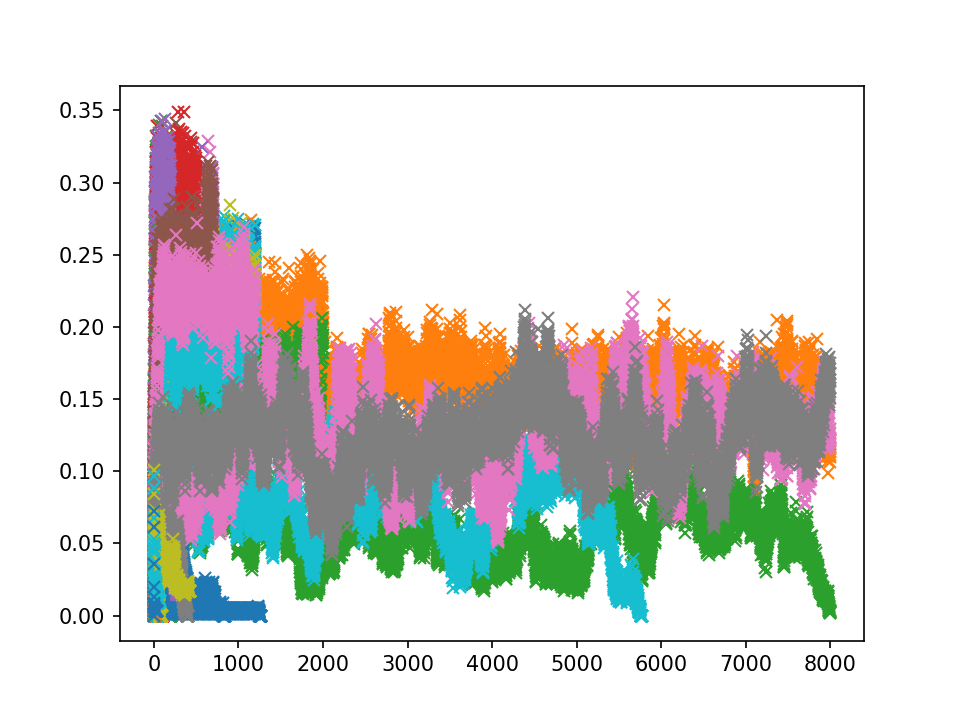

81
81
pmc11 204 0.000 0.001 ltl 3 11 15 14 18 128 108 2
pmc11 7999 0.002 0.021 ltl 3 12 15 12 19 128 108 12
pmc11 204 0.008 0.000 ltl 3 13 15 12 20 128 108 24
 i-iper 48 33
pmc11 5772 0.000 0.005 ltl 3 12 16 12 19 128 108 39
pmc11 1272 0.000 0.001 ltl 3 12 16 13 19 128 108 40
 i-iper 48 42
pmc11 840 0.000 0.009 ltl 3 12 16 14 20 128 108 50
pmc11 408 0.000 0.003 ltl 3 12 17 13 19 128 108 67
pmc11 432 0.017 0.008 ltl 3 13 17 12 20 128 108 78
8.0


In [78]:
from __future__ import print_function

from scipy.ndimage import filters
import time

from pylab import *
import matplotlib.pyplot as plt


plt.figure()



print(ndbmin* ndbmax* ndsmin* ndsmax)

print(ns*(1-pskip)*ndbmin* ndbmax* ndsmin* ndsmax)

#matplotlib.rc("image",cmap="gray")
#matplotlib.rc("image",cmap="hot")
##matplotlib.rc("image",cmap="RdYlGn")
##matplotlib.rc("image",cmap="BrBG")
#matplotlib.rc("image",cmap="copper")
#matplotlib.rc("image",cmap="afmhot")
#matplotlib.rc("image",cmap="autumn")
#matplotlib.rc("image",cmap="summer")

#matplotlib.rc("image",interpolation="nearest")


plt.ion()
#plt.ioff()


#img_plot = plt.imshow(a)
#plt.show(block=False)


####plt.matshow())
##plt.figure()
#### wrong: extent=(xlo, xhi, ylo, yhi) ) 
##, interpolation="nearest")
##, cmap = plt.cm.gray)

time1 = time.clock()


OR = logical_or
AND = logical_and

id1=-1

plotysum=zeros( (niter,1) )

for j in range(ns):


    for dbmax in range(ndbmax):

        bmax=bmax0+dbmax

        for dsmax in range(ndsmax):

            smax=smax0+dsmax


            for dbmin in range(ndbmin):

                bmin=bmin0+dbmin

                for dsmin in range(ndsmin):

                    smin=smin0+dsmin


                    if   rand()<pskip  or  bmax<bmin or (smax+1) < smin: continue #####not break
                    
                    
                    
                    id1+=1
                    
                    
                    
                    

                    p=0.5#0.3#0.5 #0.25 #0.16
                    
                    a = zeros( ( h, w ), dtype=bool) 
                    a[ h0 : h0+h2 , w0 : w0+w2 ] = (rand( h2, w2 )<p) 
                    
                    #a=(rand( h, w )<p) 


                    
                    afade = 0.1 * a
                    ##averyold = a ###
                    averyold = 0 
                    aold360=0
                    aold420=0
                    aold840=0
                    
                    
                    
                    plotx=zeros( (niter,1) )
                    ploty=zeros( (niter,1) )
                    plotz=zeros( (niter,1) )
                    
                    dam51=0
                    
                    
                    
                    
                    iper=0
                    
                    ahistory=[0]*int(3+niter/12)
                    assert step1==12
                    
                    
                    settleTime=2e9


                    for i in range(1,niter):

                        n41 =   diam*diam*filters.uniform_filter(0.0+a,diam )   ##,mode='wrap')  )  
                        n=n41.round()   
                        birth = AND(  n>=bmin,  AND( n<=bmax, logical_not(a) )  )
                        survi = AND(  n>=smin,  AND( n<=smax, a )  )
                        a =  OR( birth , survi )  

                        #as51=(0.0+a).sum()
                        am51=(0.0+a).mean()

                        ######settleTime=i

                        plotx[i]=i
                        ploty[i]=am51 #as51



                        if (i % 12)==0:
                            ahistory[i//12] =a
                            #ahistory[i/12] =a

                        
                        
                        if (i % 24)==0:
                            aslower=ahistory[i//24]
                            #aslower=ahistory[i/24]
                            if (a==aslower).all() :
                                #print(' ',i,id1)
                                if iper==0:
                                    settleTime=i//2 ##/2
                                    iper=i
                                else:
                                    print(' i-iper',i-iper,id1)
                                    break
                            




                        if (i % step1)==0:

                            if bfade:
                                afade = q*a + (1-q)*afade
                                asho=afade
                            else:
                                asho=0+a
                                
                            ada51= logical_xor(a, averyold)  
                            averyold =a 


                            olddam51=dam51
                            dam51=ada51.mean()
                            
                            plotz[i]=dam51

                            if dam51 == 0 :
                                settleTime=i
                                #print('dam51==0',id1)
                                break
                            
                            
                            
                            
                            
                        if (i % 360)==0:
                            if (a==aold360).all():
                                print(' p360:',i,iper,id1)
                                #print(i,am51,dam51,bmin,bmax,smin,smax)
                                settleTime=i-360
                                break
                            aold360=a

                        if (i % 840)==0:
                            if (a==aold840).all():
                                print(' p840:',i,iper,id1)
                                #print(i,am51,dam51,bmin,bmax,smin,smax)
                                settleTime=i-840
                                break
                            aold840=a


                        #250#175: #0.200 
                        if i ==100 and am51 >0.320:
                            break

                        if i ==200 and am51 >0.300:
                            break



                        if i ==300 and am51 >0.290:
                            break




                        if i ==500 and am51 >0.270:
                            break




                        if i ==700 and am51 >0.240:
                            break

                        if i ==1200 and am51 >0.200:
                            break

                        if i ==2000 and am51 >0.175:
                            break
                            

                        if (i % step2)==0:
                            sam51='{:.3f}'.format(am51)
                            sdam51='{:.3f}'.format(dam51)
                            #print( i, sam51, sdam51)
                            
                            #if am51 >0.250:#175: #0.200 :
                                #break #################250


                    dam51=olddam51
                    
                    if i<settleTime:
                        settleTime=i
                        
                    sam51='{:.3f}'.format(am51)
                    sdam51='{:.3f}'.format(dam51)
                    #if dam51>0.005 and dam51<0.150 and am51>0.005 and am51<0.150:
                    #if dam51>0.001 and dam51<0.150 and am51>0.001 and am51<0.150:
                    #if dam51>0.000 and dam51<0.150 and am51>0.000 and am51<0.150 and settleTime>70:
                    #if dam51>0.000 and dam51<0.150 and am51>0.000 and am51<0.150 and settleTime>150:
                    #if dam51>0.001 and dam51<0.150 and am51>0.000 and am51<0.150 and settleTime>450:
                    #if dam51>0.000 and dam51<0.150 and am51>0.000 and am51<0.150 and settleTime>450:
                    #if  am51>0.000 and am51<0.175 and settleTime>400:
                    #if  dam51<0.150 and am51>0.000 and am51<0.175 and settleTime>200:#50:#500:#1000:#400:#600: #1200:
                    if  dam51<0.150  and am51<am51printthres        and settleTime>200: #150:#200:#50:#500:#1000:#400:#600: #1200:
                        print('pmc11',settleTime,sam51,sdam51,'ltl',r,bmin,bmax,smin,smax,w,w2,id1)
                        #plot(ploty[:settleTime],'x')
                        #plot(ploty,'x-')
                       
                    
                    
                    if am51<0.999:#500:#100: #500: #0.200 :
                        plot(ploty[:settleTime],'x')
                        #plot(ploty,'x-')
                        ##plot(plotz,'x')
                        ##plot( ploty[niter0:], plotz[niter0:],'x')
                    
                    
                    
                    
                    ##plotysum += ploty
                    
time2 = time.clock()
print( round(time2-time1,0) )
                    
                    
                    

In [76]:
pmc11str='''
pmc11 1404 0.000 0.003 ltl 3 12 16 13 19 128 108 68

pmc11 7999 0.010 0.013 ltl 3 12 15 12 19 128 108 12
pmc11 5940 0.002 0.002 ltl 3 12 16 12 19 128 108 39

pmc11 5556 0.001 0.002 ltl 3 12 15 12 19 128 108 13
pmc11 5904 0.000 0.001 ltl 3 12 16 12 19 128 108 40

pmc11 3999 0.019 0.071 ltl 3 12 16 12 19 128 108 40
pmc11 3999 0.036 0.074 ltl 3 12 15 12 19 128 108 13

pmc11 1999 0.030 0.061 ltl 3 12 16 12 19 128 108 39
pmc11 1999 0.073 0.076 ltl 3 12 17 12 19 128 108 66

pmc11 1080 0.004 0.005 ltl 3 12 16 13 19 128 108 68
pmc11 1999 0.076 0.124 ltl 3 12 15 12 19 128 108 40
pmc11 1320 0.004 0.005 ltl 3 12 15 12 19 128 108 67
pmc11 252 0.001 0.001 ltl 3 12 14 12 19 128 108 40
'''
sp1=pmc11str.split(' ')
bmin0=int(sp1[6])
bmax0=int(sp1[7])
smin0=int(sp1[8])
smax0=int(sp1[9])

bmin0 -= 1; bmax0 -= 1; smin0 -= 1; smax0 -= 1


In [71]:

w=128#80#64#40#32#40#64#80#128#160#256##320#240#320 ##64*diam #256 #1850 #2000 #2250 #1800
h=w #256 #1300 #1400 #950

w0=10#5#10#15#20#30#40#64#128
h0=w0#64#128

w2=w-2*w0#240#128#16#25#16
h2=w2##240#128#16#25#16


ns=1#9#15#30#1 #7#10 #3

niter =8000 #4000#2000#1000 #300#150# 600 #300 #400 #200 #1000 #3000   
#niter0=niter-150



In [50]:

r=3
am51printthres=      0.175

diam = 2*r + 1


##bmin0=7; bmax0=11; smin0=7; smax0=10
##bmin0=7; bmax0=8; smin0=6; smax0=10
bmin0=14; bmax0=18; smin0=12; smax0=20
bmin0=12; bmax0=14; smin0=12; smax0=18
bmin0=12; bmax0=14; smin0=12; smax0=19
#r3b12t14s12t19		1
#r3b12t16s12t18		1
bmin0 -= 1; bmax0 -= 1; smin0 -= 1; smax0 -= 1


#bmin0=12; bmax0=12; smin0=12; smax0=12




pskip=0;ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
pskip=0;ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3
##ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
#pskip=0;ndbmin=1; ndbmax=3; ndsmin=1; ndsmax=2

##pskip=0.5; ndbmin=4; ndbmax=12; ndsmin=4; ndsmax=10
##pskip=0.95; ndbmin=6; ndbmax=12; ndsmin=6; ndsmax=10
##pskip=0.9; ndbmin=6; ndbmax=12; ndsmin=6; ndsmax=10
#pskip=0.7; ndbmin=6; ndbmax=12; ndsmin=6; ndsmax=10
#pskip=0.3; ndbmin=6; ndbmax=12; ndsmin=6; ndsmax=10


#=============================

w=80#64#40#32#40#64#80#128#160#256##320#240#320 ##64*diam #256 #1850 #2000 #2250 #1800
h=w #256 #1300 #1400 #950

w0=10#5#10#15#20#30#40#64#128
h0=w0#64#128

w2=w-2*w0#240#128#16#25#16
h2=w2##240#128#16#25#16
#=============================


ns=1#9#15#30#1 #7#10 #3

niter =600 #300#150# 600 #300 #400 #200 #1000 #3000   
#niter0=niter-150


In [46]:

r=2
am51printthres=      0.050

diam = 2*r + 1

bmin0=7; bmax0=11; smin0=7; smax0=10
bmin0=7; bmax0=8; smin0=6; smax0=10
bmin0=7; bmax0=9; smin0=7; smax0=10
#bmin0=6; bmax0=6; smin0=6; smax0=6
#bmin0=5; bmax0=6; smin0=5; smax0=6
#bmin0=4; bmax0=5; smin0=4; smax0=5

ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
#ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
#ndbmin=2; ndbmax=3; ndsmin=2; ndsmax=3
ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3
#ndbmin=3; ndbmax=4; ndsmin=3; ndsmax=4
#ndbmin=2; ndbmax=6; ndsmin=2; ndsmax=5
#ndbmin=3; ndbmax=6; ndsmin=3; ndsmax=5
#ndbmin=5; ndbmax=8; ndsmin=5; ndsmax=8
pskip=0


#=============================

w=160#128#80#64#40#32#40#64#80#128#160#256##320#240#320 ##64*diam #256 #1850 #2000 #2250 #1800
h=w #256 #1300 #1400 #950

w0=10#5#10#15#20#30#40#64#128
h0=w0#64#128

w2=w-2*w0#240#128#16#25#16
h2=w2##240#128#16#25#16
#=============================




ns=1#9#15#30#1 #7#10 #3

niter =600 #300#150# 600 #300 #400 #200 #1000 #3000   
#niter0=niter-150


In [18]:

r=1
am51printthres=      0.175

diam = 2*r + 1

bmin0=2; bmax0=2; smin0=2; smax0=2
bmin0=3; bmax0=3; smin0=3; smax0=4
bmin0=2; bmax0=2; smin0=2; smax0=3

ndbmin=3; ndbmax=7; ndsmin=3; ndsmax=1
ndbmin=3; ndbmax=7; ndsmin=3; ndsmax=7
#ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
ndbmin=4; ndbmax=4; ndsmin=4; ndsmax=4
ndbmin=3; ndbmax=4; ndsmin=3; ndsmax=4
ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3
pskip=0


#=============================


w=40#32#40#64#80#128#160#256##320#240#320 ##64*diam #256 #1850 #2000 #2250 #1800
h=w #256 #1300 #1400 #950

w0=5#10#15#20#30#40#64#128
h0=w0#64#128

w2=w-2*w0#240#128#16#25#16
h2=w2##240#128#16#25#16
#=============================




ns=1#9#15#30#1 #7#10 #3

niter =400 #600#1100 #300#150# 600 #300 #400 #200 #1000 #3000   
#niter0=niter-150


In [5]:
10//12


0

In [7]:
12//12

1